In [74]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data
# Set Seaborn style
sns.set_style('darkgrid')
#defining paths
#results_milestones = 'Milestones - timesStandard-prod.csv'
# results_milestones = '2024_data/testData.csv'
results_milestones =  '2024_data/Milestones - MILESTONE NOTEBOOK_ timesStandard-prod.csv'
dataBinary_milestones = pd.read_csv(results_milestones)


In [2]:
dataBinary_milestones

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,sound solution,alternative answer,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,2:35 PM,17,17,18,18,19,21,21,24,...,n,NaN,y,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,...,y,NaN,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,58,58,58,...,y,NaN,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3,19,23,23,23,27,27,46,...,y,N,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,...,n,NaN,y,y,Control,4612,1.0,1.0,NaN,NaN
5,hk486@nau.edu,3:22 PM,20,25,31,31,31,32,33,37,...,y,N,y,y,Treatment,5069,NaN,NaN,4.0,2.0
6,kv582@nau.edu,12:44 PM,11,19,20,25,25,25,30,30,...,n,NaN,y,y,Control,5485,1.0,1.0,NaN,NaN
7,vg588@nau.edu,4:34 PM,5,25,35,35,35,37,37,37,...,y,NaN,y,y,Treatment,5485,NaN,NaN,2.0,0.0
8,ma3932@nau.edu,4:13 PM,7,33,43,43,43,43,43,43,...,y,NaN,y,y,Treatment,5485,NaN,NaN,5.0,1.0
9,"nk545@nau,edu",3:14 PM,7,22,25,25,37,46,57,57,...,y,N,y,y,Control,5069,2.0,2.0,NaN,NaN


In [3]:
#checking if I have to remove the NaN. Removing jk2396 to calculate the 'method' mean 

In [4]:
dataBinary_milestones_valid = dataBinary_milestones[['Participant','start','issue','problem','folder','file','class','method','line','solution','implement','end','right folder', 'right file', 'right class', 'right method', 'sound solution', 'right lines', 'group','issue_number']]
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)
dataBinary_milestones_valid

/tmp/ipykernel_1400/3675188266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)


,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,right folder,right file,right class,right method,sound solution,right lines,group,issue_number
0,ItaloSantos,2:35 PM,17,17,18,18,19,21,21,24,43,45,y,y,y,n,n,n,Control,5679
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,50,55,y,y,y,y,y,y,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,58,58,58,58,58,n,n,n,n,y,n,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23,23,23,27,27,46,46,46,n,n,n,n,y,n,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,56,56,n,n,n,n,n,n,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31,31,31,32,33,37,38,38,n,n,n,n,y,n,Treatment,5069
6,kv582@nau.edu,12:44 PM,11,19,20,25,25,25,30,30,32,35,n,n,n,n,n,n,Control,5485
7,vg588@nau.edu,4:34 PM,5,25,35,35,35,37,37,37,46,46,n,n,n,n,y,n,Treatment,5485
8,ma3932@nau.edu,4:13 PM,7,33,43,43,43,43,43,43,43,58,y,y,y,y,y,y,Treatment,5485
9,"nk545@nau,edu",3:14 PM,7,22,25,25,37,46,57,57,57,57,n,n,n,n,y,n,Control,5069


In [5]:
# correctnessMilestones = dataBinary_milestones[['right folder', 'right file', 'right class', 'right method', 'right lines', 'sound solution', 'group','issue_number']]
correctnessMilestones = dataBinary_milestones[['right folder', 'right file', 'right class', 'right method', 'right lines', 'group','issue_number']]
#  correctnessMilestones = correctnessMilestones.rename(columns={'right folder': "Rfolder", 'right file': "Rfile", 'right class': "Rclass", 'right method': "Rmethod", 'sound solution': "Rsolution", 'right lines': "Rlines"})
correctnessMilestones = correctnessMilestones.rename(columns={'right folder': "Rfolder", 'right file': "Rfile", 'right class': "Rclass", 'right method': "Rmethod", 'right lines': "Rlines"})

correctnessMilestones

,Rfolder,Rfile,Rclass,Rmethod,Rlines,group,issue_number
0,y,y,y,n,n,Control,5679
1,y,y,y,y,y,Treatment,5485
2,n,n,n,n,n,Treatment,4612
3,n,n,n,n,n,Treatment,5194
4,n,n,n,n,n,Control,4612
5,n,n,n,n,n,Treatment,5069
6,n,n,n,n,n,Control,5485
7,n,n,n,n,n,Treatment,5485
8,y,y,y,y,y,Treatment,5485
9,n,n,n,n,n,Control,5069


In [6]:

# correctnessMilestones.loc[correctnessMilestones.Rfolder == "n", 'Rfolder'] = 0
# correctnessMilestones.loc[correctnessMilestones.Rfolder == "y", 'Rfolder'] = 1

# correctnessMilestones.loc[correctnessMilestones.Rfile == "n", 'Rfile'] = 0
# correctnessMilestones.loc[correctnessMilestones.Rfile == "y", 'Rfile'] = 1

# correctnessMilestones.loc[correctnessMilestones.Rclass == "n", 'Rclass'] = 0
# correctnessMilestones.loc[correctnessMilestones.Rclass == "y", 'Rclass'] = 1

# correctnessMilestones.loc[correctnessMilestones.Rmethod == "n", 'Rmethod'] = 0
# correctnessMilestones.loc[correctnessMilestones.Rmethod == "y", 'Rmethod'] = 1

# correctnessMilestones.loc[correctnessMilestones.Rlines == "y", 'Rlines'] = 69
# correctnessMilestones.loc[correctnessMilestones.Rlines == "y", 'Rlines'] = 1

correctnessMilestones = correctnessMilestones.replace("y", 1)
correctnessMilestones = correctnessMilestones.replace("n", 0)



print(type(correctnessMilestones[0:4]))



# correctnessMilestones = correctnessMilestones.assign(Rfolder = [0 if a == 'n' else 1 for a in correctnessMilestones['Rfolder']])
# correctnessMilestones = correctnessMilestones.assign(Rfile = [0 if a == 'n' else 1 for a in correctnessMilestones['Rfile']])
# correctnessMilestones = correctnessMilestones.assign(Rclass = [0 if a == 'n' else 1 for a in correctnessMilestones['Rclass']])
# correctnessMilestones = correctnessMilestones.assign(Rmethod = [0 if a == 'n' else 1 for a in correctnessMilestones['Rmethod']])
# correctnessMilestones = correctnessMilestones.assign(Rlines = [0 if a == "n" else 1 for a in correctnessMilestones['Rlines']])
# correctnessMilestones = correctnessMilestones.assign(Rsolution = [0 if a == 'n' else 1 for a in correctnessMilestones['Rsolution']])

correctnessMilestones

<class 'pandas.core.frame.DataFrame'>


,Rfolder,Rfile,Rclass,Rmethod,Rlines,group,issue_number
0,1,1,1,0,0,Control,5679
1,1,1,1,1,1,Treatment,5485
2,0,0,0,0,0,Treatment,4612
3,0,0,0,0,0,Treatment,5194
4,0,0,0,0,0,Control,4612
5,0,0,0,0,0,Treatment,5069
6,0,0,0,0,0,Control,5485
7,0,0,0,0,0,Treatment,5485
8,1,1,1,1,1,Treatment,5485
9,0,0,0,0,0,Control,5069


In [7]:
# correctnessMilestones.iloc[:, 0:5]
correctnessMilestones['sum'] = correctnessMilestones[['Rfolder', 'Rfile', 'Rclass', 'Rmethod', 'Rlines']].sum(axis=1)
correctnessMilestones




,Rfolder,Rfile,Rclass,Rmethod,Rlines,group,issue_number,sum
0,1,1,1,0,0,Control,5679,3
1,1,1,1,1,1,Treatment,5485,5
2,0,0,0,0,0,Treatment,4612,0
3,0,0,0,0,0,Treatment,5194,0
4,0,0,0,0,0,Control,4612,0
5,0,0,0,0,0,Treatment,5069,0
6,0,0,0,0,0,Control,5485,0
7,0,0,0,0,0,Treatment,5485,0
8,1,1,1,1,1,Treatment,5485,5
9,0,0,0,0,0,Control,5069,0


In [8]:
milestonesAgg = correctnessMilestones.groupby('group').agg('sum')

,Rfolder,Rfile,Rclass,Rmethod,Rlines,issue_number,sum
group,,,,,,,
Control,6,6,6,5,5,63339,28
Treatment,7,7,7,7,7,73117,35


<AxesSubplot:xlabel='sum', ylabel='group'>

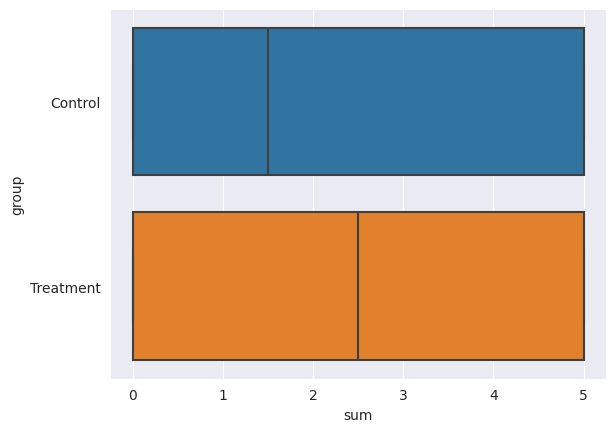

In [73]:
sns.boxplot(correctnessMilestones, x='sum', y='group')

In [9]:
dataBinary_milestones_valid

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,right folder,right file,right class,right method,sound solution,right lines,group,issue_number
0,ItaloSantos,2:35 PM,17,17,18,18,19,21,21,24,43,45,y,y,y,n,n,n,Control,5679
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,50,55,y,y,y,y,y,y,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,58,58,58,58,58,n,n,n,n,y,n,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23,23,23,27,27,46,46,46,n,n,n,n,y,n,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,56,56,n,n,n,n,n,n,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31,31,31,32,33,37,38,38,n,n,n,n,y,n,Treatment,5069
6,kv582@nau.edu,12:44 PM,11,19,20,25,25,25,30,30,32,35,n,n,n,n,n,n,Control,5485
7,vg588@nau.edu,4:34 PM,5,25,35,35,35,37,37,37,46,46,n,n,n,n,y,n,Treatment,5485
8,ma3932@nau.edu,4:13 PM,7,33,43,43,43,43,43,43,43,58,y,y,y,y,y,y,Treatment,5485
9,"nk545@nau,edu",3:14 PM,7,22,25,25,37,46,57,57,57,57,n,n,n,n,y,n,Control,5069


In [10]:

#dataBinary_milestones_valid[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [11]:
#dataBinary_milestones_valid['issue'].plot(kind='line',  ms=10)

#plt.show()

In [12]:
dataBinary_milestones_valid.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.750000,20.916667,30.750000,31.250000,32.750000,34.083333,35.416667,41.250000,45.666667,48.250000,5278.250000
Treatment,5.357143,18.571429,35.285714,38.142857,38.357143,39.714286,40.000000,42.857143,46.142857,48.928571,5222.642857


In [13]:
dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'jk2396@nau.edu'].index)


In [14]:
dataBinary_milestones_valid_jk2396

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,right folder,right file,right class,right method,sound solution,right lines,group,issue_number
0,ItaloSantos,2:35 PM,17,17,18,18,19,21,21,24,43,45,y,y,y,n,n,n,Control,5679
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,50,55,y,y,y,y,y,y,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,58,58,58,58,58,n,n,n,n,y,n,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23,23,23,27,27,46,46,46,n,n,n,n,y,n,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,56,56,n,n,n,n,n,n,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31,31,31,32,33,37,38,38,n,n,n,n,y,n,Treatment,5069
6,kv582@nau.edu,12:44 PM,11,19,20,25,25,25,30,30,32,35,n,n,n,n,n,n,Control,5485
7,vg588@nau.edu,4:34 PM,5,25,35,35,35,37,37,37,46,46,n,n,n,n,y,n,Treatment,5485
8,ma3932@nau.edu,4:13 PM,7,33,43,43,43,43,43,43,43,58,y,y,y,y,y,y,Treatment,5485
9,"nk545@nau,edu",3:14 PM,7,22,25,25,37,46,57,57,57,57,n,n,n,n,y,n,Control,5069


In [15]:
#dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid_jk2396['method']

In [16]:
dataBinary_milestones_valid_jk2396[['method','group']].groupby(['group']).mean()

,method
group,
Control,34.083333
Treatment,39.153846


In [17]:
dataBinary_milestones_valid_T = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']

In [18]:
dataBinary_milestones_valid_C = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']

In [19]:
#dataBinary_milestones_valid_T[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [20]:
#dataBinary_milestones_valid_C[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [21]:
means = dataBinary_milestones_valid.groupby(['group']).mean()
means

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.750000,20.916667,30.750000,31.250000,32.750000,34.083333,35.416667,41.250000,45.666667,48.250000,5278.250000
Treatment,5.357143,18.571429,35.285714,38.142857,38.357143,39.714286,40.000000,42.857143,46.142857,48.928571,5222.642857


In [22]:
ypoints_C = means.iloc[0:1,0:9]
ypoints_C

,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Control,9.75,20.916667,30.75,31.25,32.75,34.083333,35.416667,41.25,45.666667


In [23]:
ypoints_C.to_csv('ypoints_C.csv',index=False)

In [24]:
ypoints_C2 = pd.read_csv('ypoints_C.csv')
ypoints_C2

,issue,problem,folder,file,class,method,line,solution,implement
0,9.75,20.916667,30.75,31.25,32.75,34.083333,35.416667,41.25,45.666667


In [25]:
ypoints_T = means.iloc[1:2,0:9]
ypoints_T

,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Treatment,5.357143,18.571429,35.285714,38.142857,38.357143,39.714286,40.0,42.857143,46.142857


In [26]:
ypoints_T.to_csv('ypoints_T.csv',index=False)

In [27]:
ypoints_T2 = pd.read_csv('ypoints_T.csv')
ypoints_T2

,issue,problem,folder,file,class,method,line,solution,implement
0,5.357143,18.571429,35.285714,38.142857,38.357143,39.714286,40.0,42.857143,46.142857


In [28]:
ypoints_T2.dtypes

issue        float64
problem      float64
folder       float64
file         float64
class        float64
method       float64
line         float64
solution     float64
implement    float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

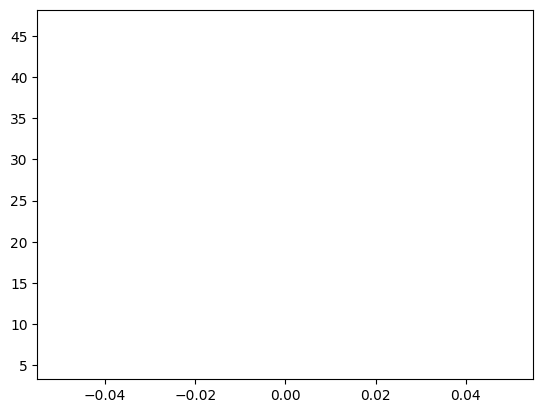

In [29]:

plt.plot(ypoints_T2, color='r')
plt.show

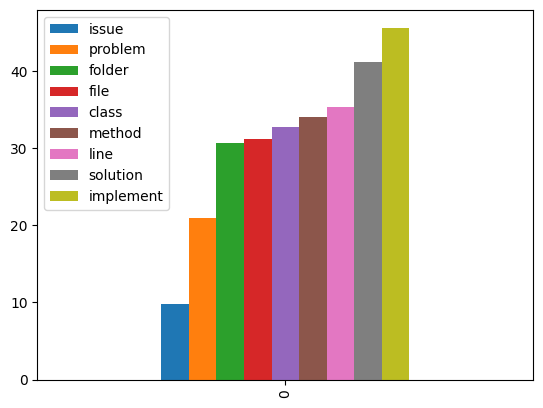

In [30]:
ypoints_C2[['issue','problem','folder','file','class','method','line','solution','implement']].plot(kind='bar')

plt.show()

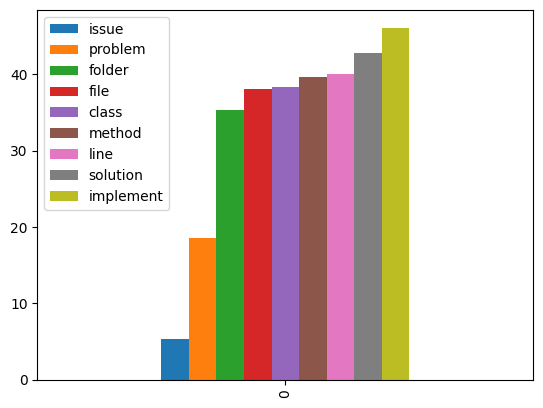

In [31]:
ypoints_T2[['issue','problem','folder','file','class','method','line','solution','implement']].plot(kind='bar')

plt.show()

In [32]:
dataBinary_milestones_valid.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,7.750000,12.50,39.000000,46.25,46.750000,47.500000,47.5,49.75,51.250000,56.25
5069,9.200000,28.20,41.400000,42.20,44.800000,46.800000,49.2,50.40,52.600000,54.20
5194,5.000000,27.75,33.750000,35.50,35.500000,38.000000,38.0,43.25,45.000000,48.25
5485,7.000000,15.50,28.600000,29.30,29.400000,29.800000,30.4,36.00,41.500000,44.00
5679,8.333333,18.00,26.333333,26.00,27.666667,30.333333,31.0,37.00,43.666667,45.00


In [33]:
dataBinary_milestones_valid.groupby(['group','issue_number']).mean()

issue  problem  folder       file      class  \
group     issue_number                                                     
Control   4612          13.000000     18.0    34.5  34.500000  34.500000   
          5069           6.500000     33.0    42.0  42.500000  48.500000   
          5194          13.000000     51.0    51.0  51.000000  51.000000   
          5485           8.600000     14.2    26.2  27.400000  27.600000   
          5679          11.000000     13.5    17.0  16.500000  19.000000   
Treatment 4612           2.500000      7.0    43.5  58.000000  59.000000   
          5069          11.000000     25.0    41.0  42.000000  42.333333   
          5194           2.333333     20.0    28.0  30.333333  30.333333   
          5485           5.400000     16.8    31.0  31.200000  31.200000   
          5679           3.000000     27.0    45.0  45.000000  45.000000   

                           method       line   solution  implement        end  
group     issue_number                                                         
Control   4612          36.000000  36.000000  40.500000  43.500000  53.500000  
          5069          53.000000  58.500000  58.500000  58.500000  58.500000  
          5194          51.000000  51.000000  52.000000  54.000000  57.000000  
          5485          27.800000  28.800000  38.600000  43.600000  44.600000  
          5679          20.500000  20.500000  26.000000  36.000000  37.500000  
Treatment 4612          59.000000  59.000000  59.000000  59.000000  59.000000  
          5069          42.666667  43.000000  45.000000  48.666667  51.333333  
          5194          33.666667  33.666667  40.333333  42.000000  45.333333  
          5485          31.800000  32.000000  33.400000  39.400000  43.400000  
          5679          50.000000  52.000000  59.000000  59.000000  60.000000

In [34]:
dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,2.500000,7.0,43.5,58.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
5069,11.000000,25.0,41.0,42.000000,42.333333,42.666667,43.000000,45.000000,48.666667,51.333333
5194,2.333333,20.0,28.0,30.333333,30.333333,33.666667,33.666667,40.333333,42.000000,45.333333
5485,5.400000,16.8,31.0,31.200000,31.200000,31.800000,32.000000,33.400000,39.400000,43.400000
5679,3.000000,27.0,45.0,45.000000,45.000000,50.000000,52.000000,59.000000,59.000000,60.000000


In [35]:
dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,13.0,18.0,34.5,34.5,34.5,36.0,36.0,40.5,43.5,53.5
5069,6.5,33.0,42.0,42.5,48.5,53.0,58.5,58.5,58.5,58.5
5194,13.0,51.0,51.0,51.0,51.0,51.0,51.0,52.0,54.0,57.0
5485,8.6,14.2,26.2,27.4,27.6,27.8,28.8,38.6,43.6,44.6
5679,11.0,13.5,17.0,16.5,19.0,20.5,20.5,26.0,36.0,37.5


In [36]:
T_mean = dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

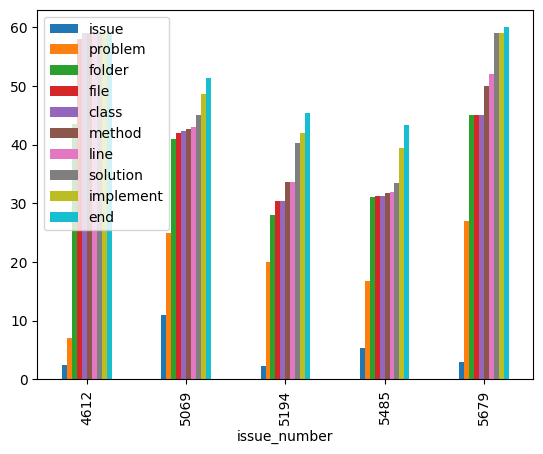

In [37]:
T_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

In [38]:
C_mean = dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

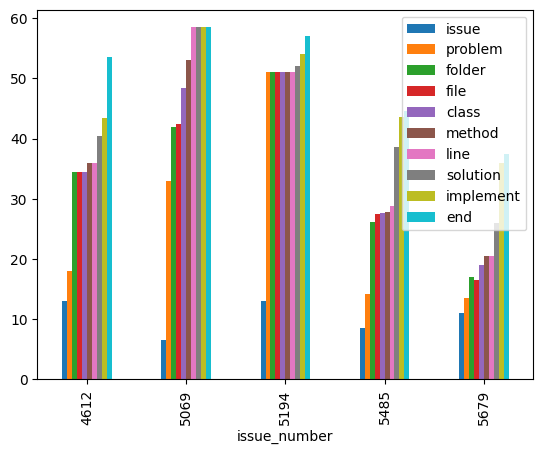

In [39]:
C_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

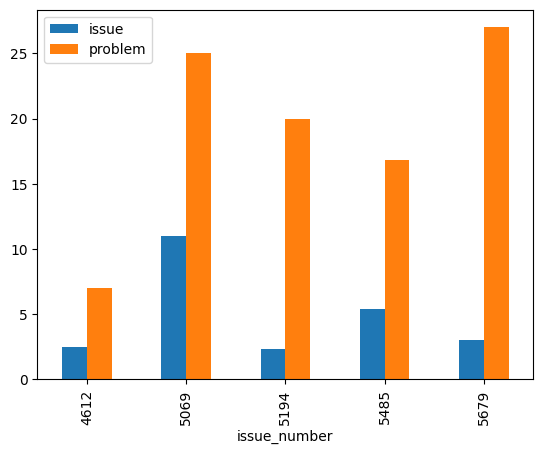

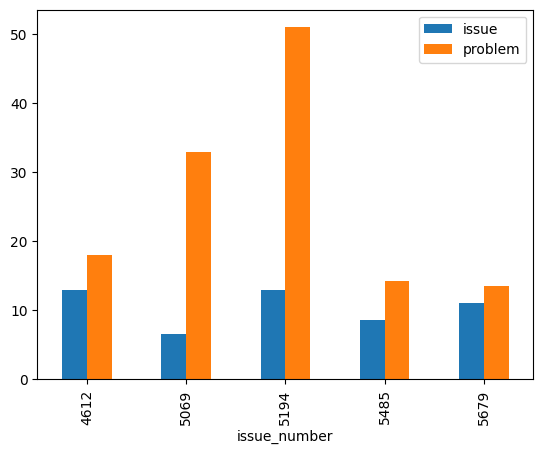

In [40]:
T_mean[['issue','problem']].plot(kind='bar')
C_mean[['issue','problem']].plot(kind='bar')

plt.show()

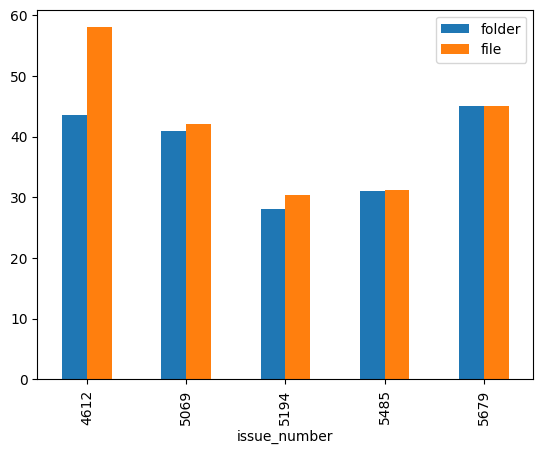

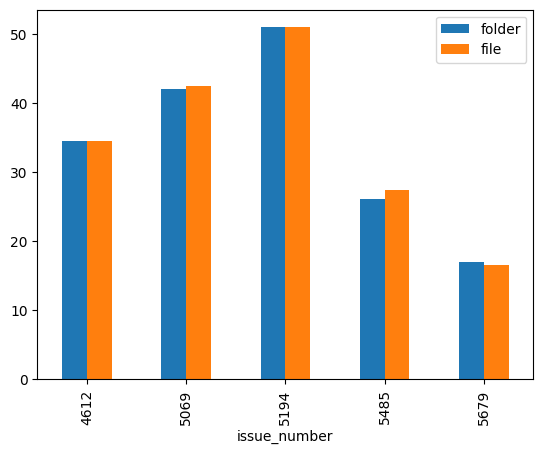

In [41]:
T_mean[['folder','file']].plot(kind='bar')
C_mean[['folder','file']].plot(kind='bar')

plt.show()

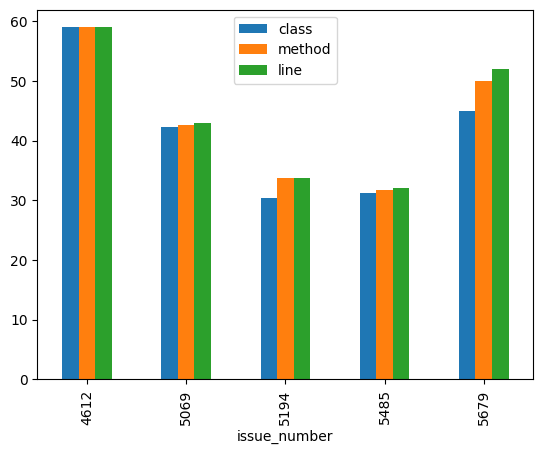

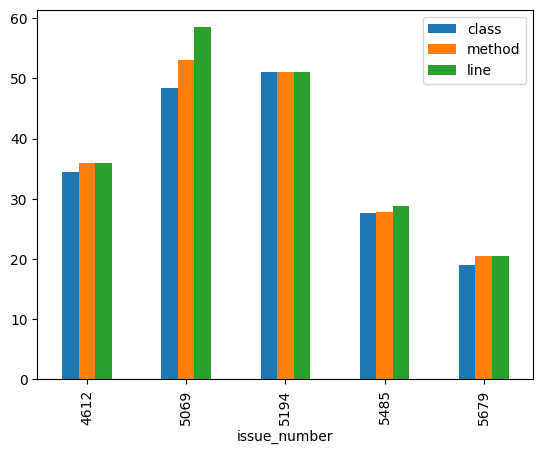

In [42]:
T_mean[['class','method', 'line']].plot(kind='bar')
C_mean[['class','method', 'line']].plot(kind='bar')

plt.show()

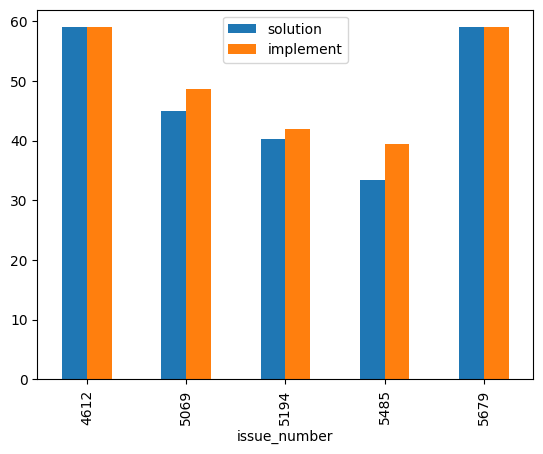

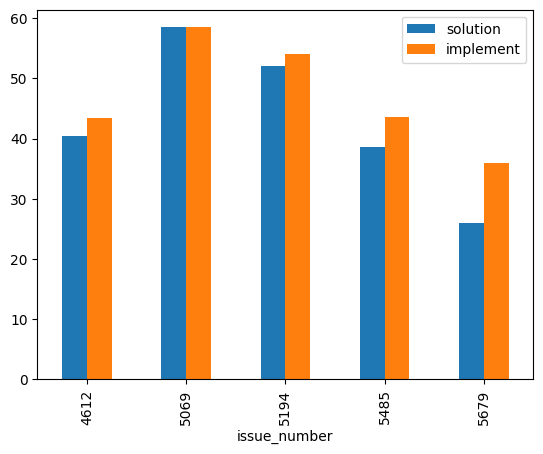

In [43]:
T_mean[['solution','implement']].plot(kind='bar')
C_mean[['solution','implement']].plot(kind='bar')

plt.show()

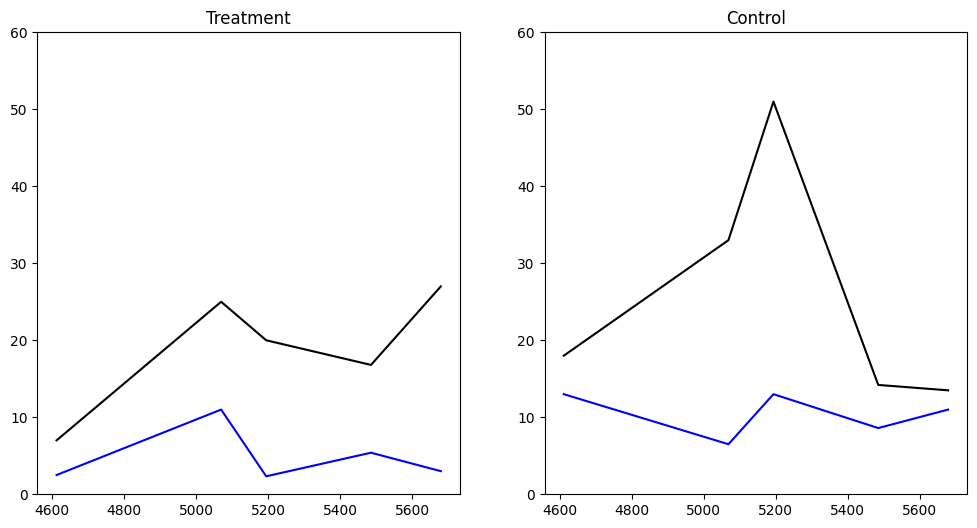

In [44]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.set_title('Treatment')
ax.plot(T_mean['issue'], color='blue', label='Treatment issue')
ax.plot(T_mean['problem'], color='black', label='Treatment problem')

ax2.set_title('Control')
ax2.plot(C_mean['issue'], color='blue', label='Control issue')
ax2.plot(C_mean['problem'], color='black', label='Control problem')

ax.set_ylim([0, 60])
ax2.set_ylim([0, 60])

plt.show()


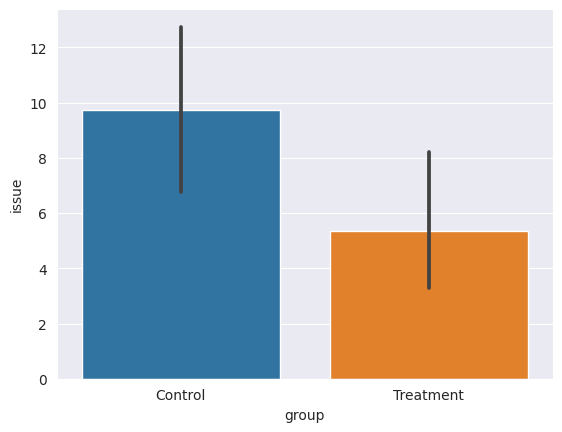

In [45]:

# Import Data
#titanic_dataset = sns.load_dataset("titanic")
# Construct plot
sns.barplot(x = "group", y = "issue", data = dataBinary_milestones_valid)
plt.show()

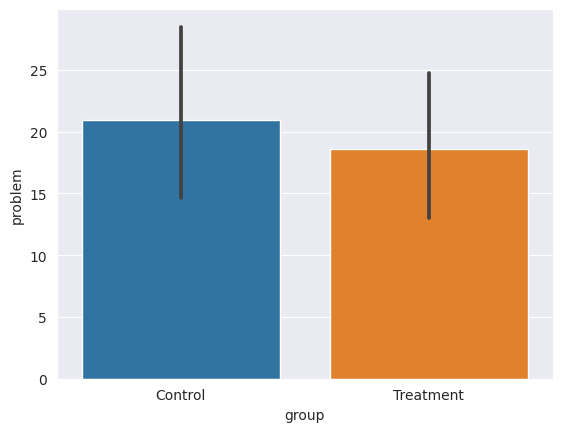

In [46]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "problem", data = dataBinary_milestones_valid)
plt.show()

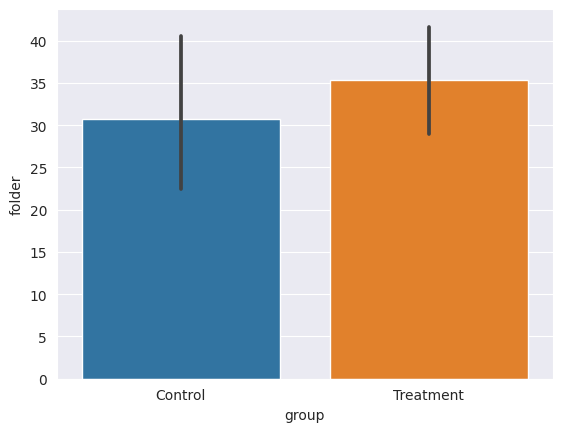

In [47]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "folder", data = dataBinary_milestones_valid)
plt.show()

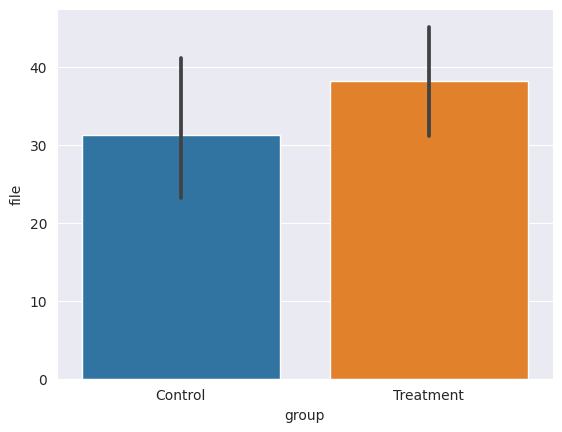

In [48]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "file", data = dataBinary_milestones_valid)
plt.show()

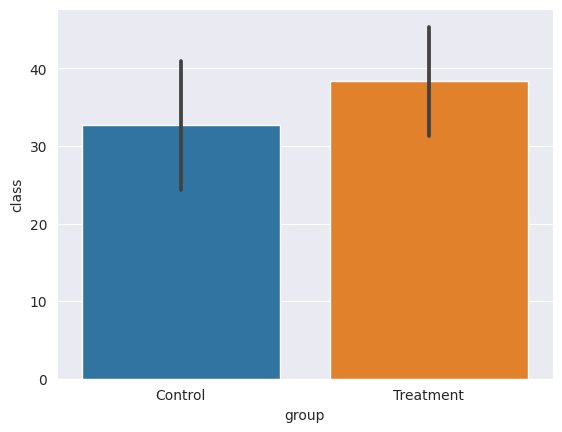

In [49]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "class", data = dataBinary_milestones_valid)
plt.show()

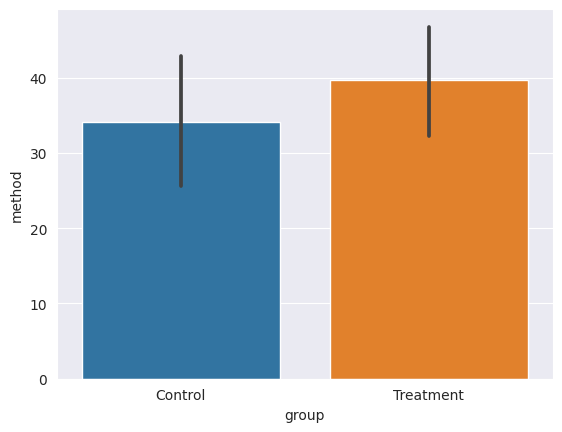

In [50]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "method", data = dataBinary_milestones_valid)
plt.show()

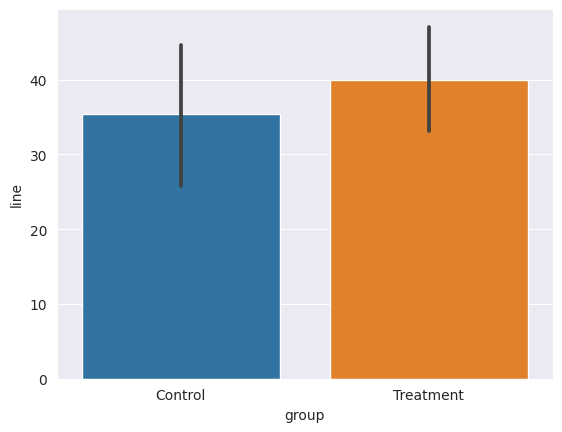

In [51]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "line", data = dataBinary_milestones_valid)
plt.show()

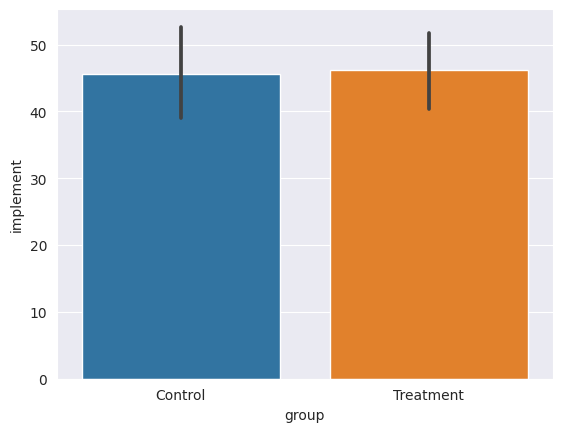

In [52]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = dataBinary_milestones_valid)
plt.show()

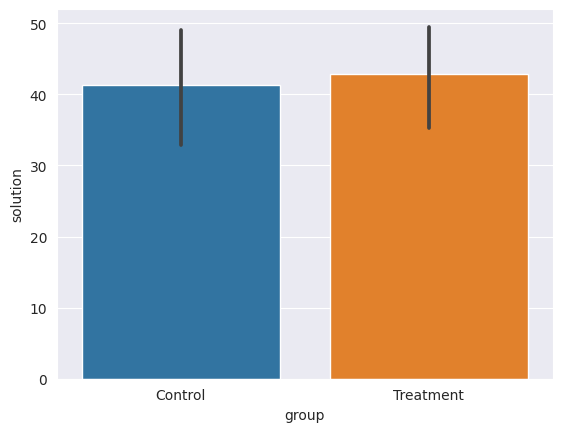

In [53]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "solution", data = dataBinary_milestones_valid)
plt.show()

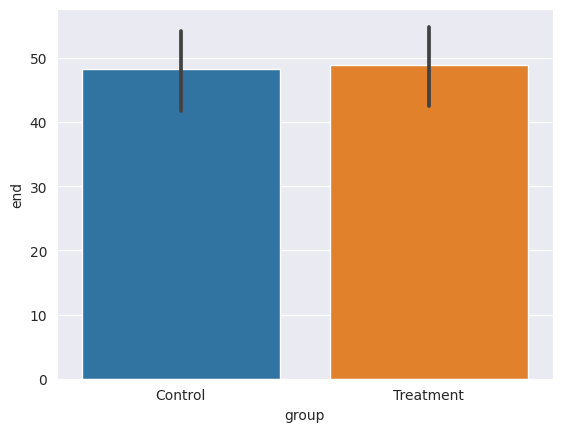

In [54]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "end", data = dataBinary_milestones_valid)
plt.show()

In [55]:
#dataBinary

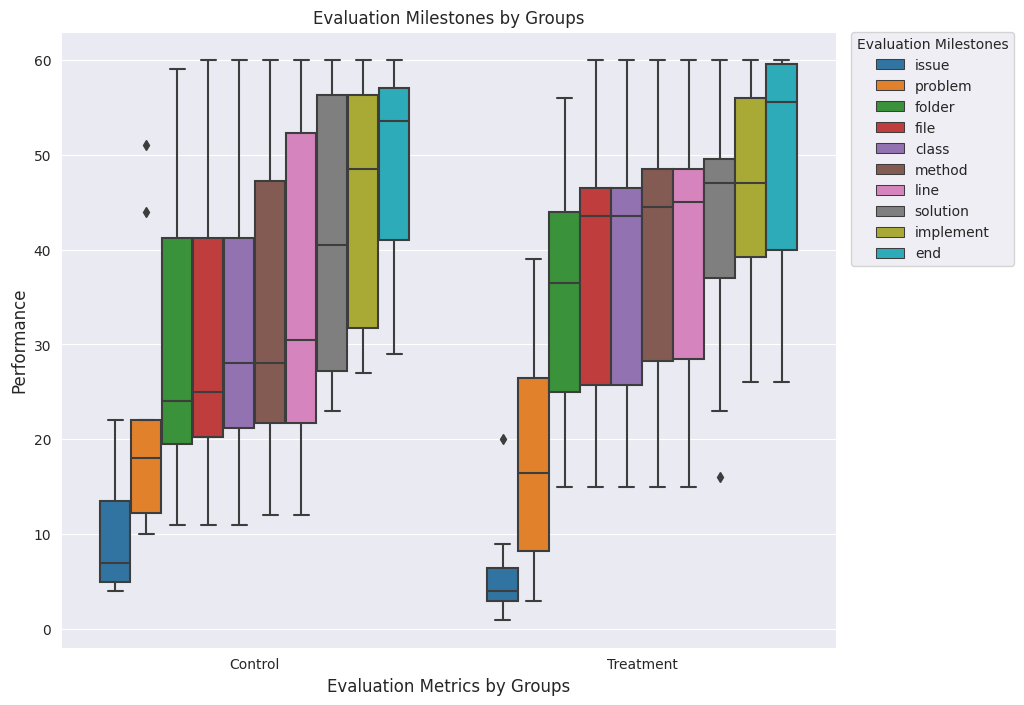

In [56]:
dd=pd.melt(dataBinary_milestones_valid,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")


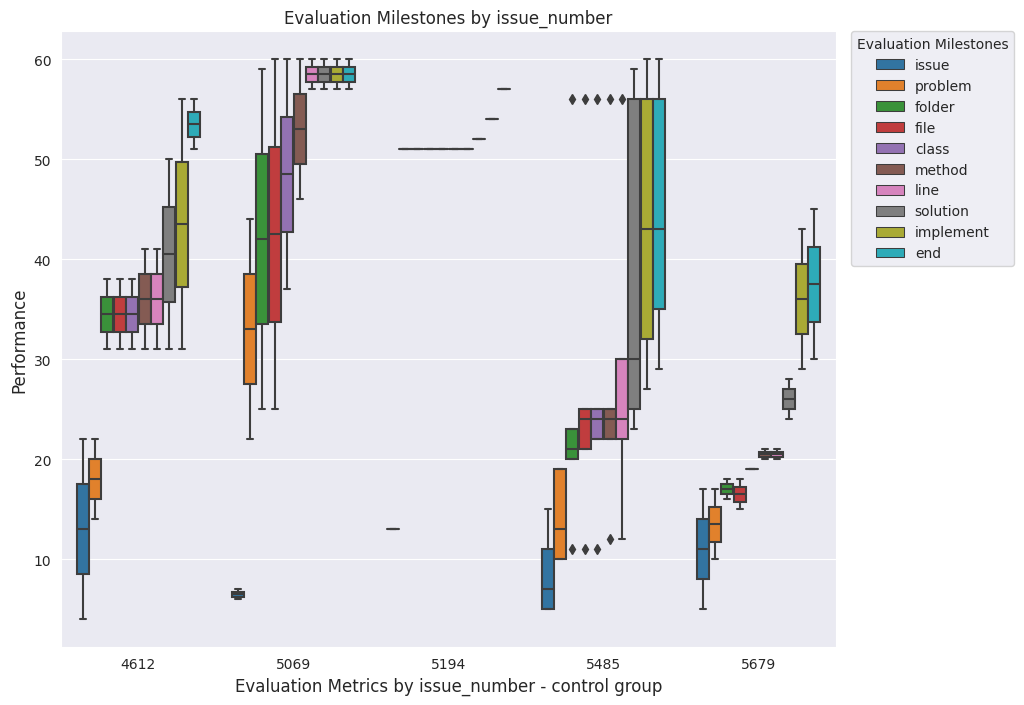

In [57]:
dd=pd.melt(dataBinary_milestones_valid_C,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

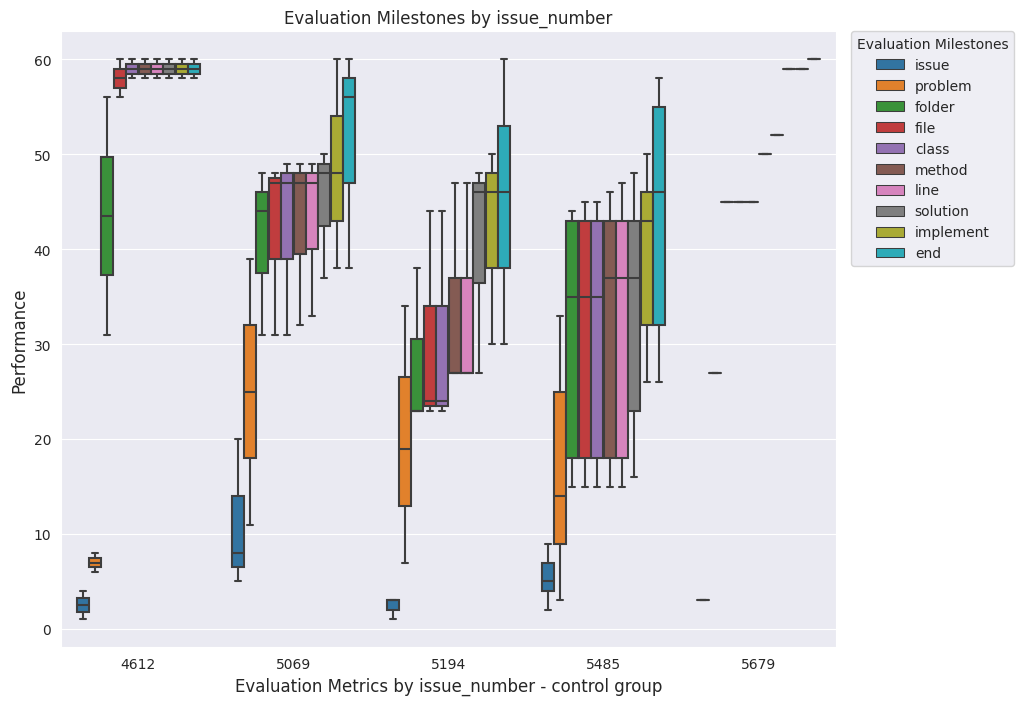

In [58]:
dd=pd.melt(dataBinary_milestones_valid_T,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

In [59]:
dataBinary_milestones_valid_5485 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5485]

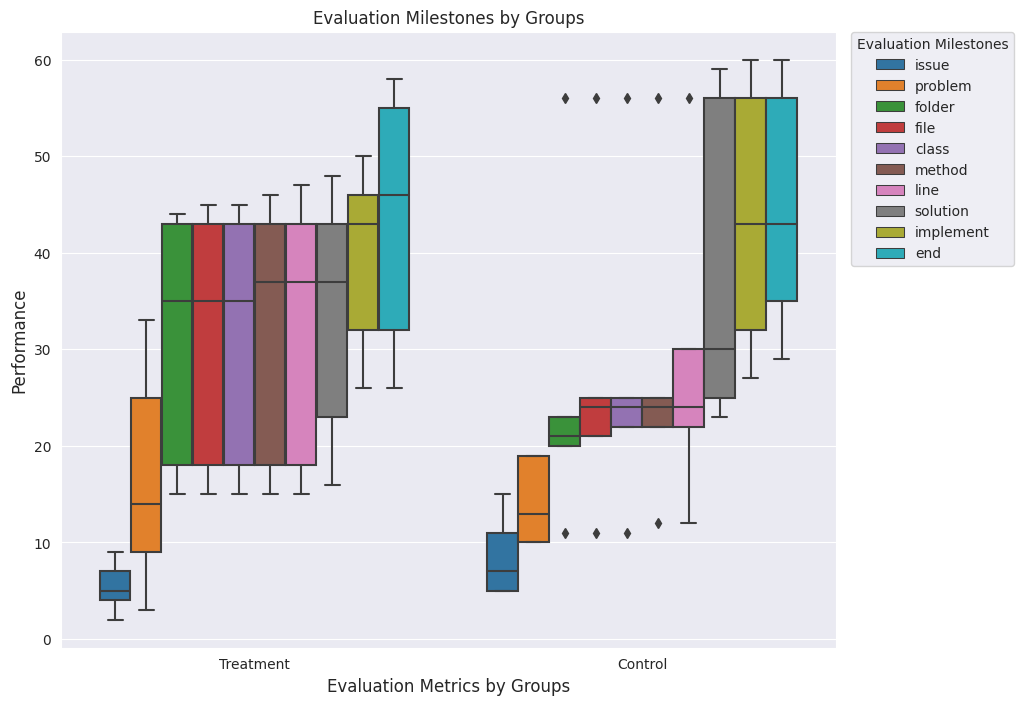

In [60]:
dd=pd.melt(dataBinary_milestones_valid_5485,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [61]:
dataBinary_milestones_valid_5485

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,right folder,right file,right class,right method,sound solution,right lines,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,50,55,y,y,y,y,y,y,Treatment,5485
6,kv582@nau.edu,12:44 PM,11,19,20,25,25,25,30,30,32,35,n,n,n,n,n,n,Control,5485
7,vg588@nau.edu,4:34 PM,5,25,35,35,35,37,37,37,46,46,n,n,n,n,y,n,Treatment,5485
8,ma3932@nau.edu,4:13 PM,7,33,43,43,43,43,43,43,43,58,y,y,y,y,y,y,Treatment,5485
13,st2364@nau.edu,3:09 PM,5,10,56,56,56,56,56,56,56,56,n,n,n,n,n,n,Control,5485
19,Jordan,5:13 PM,4,9,18,18,18,18,18,23,32,32,y,y,y,y,y,y,Treatment,5485
20,Felipe Fron,3:10 PM,7,13,23,24,24,24,24,25,27,29,y,y,y,y,y,y,Control,5485
22,Jared White,7:06 PM,5,10,11,11,11,12,12,59,60,60,y,y,y,y,y,y,Control,5485
23,Eric Dickinson,3:15 PM,15,19,21,21,22,22,22,23,43,43,y,y,y,y,y,y,Control,5485
24,Jeffrey Pristelski,5:29 PM,9,14,15,15,15,15,15,16,26,26,y,y,y,y,y,y,Treatment,5485


In [62]:
dataBinary_milestones_valid_5485.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,8.6,14.2,26.2,27.4,27.6,27.8,28.8,38.6,43.6,44.6,5485.0
Treatment,5.4,16.8,31.0,31.2,31.2,31.8,32.0,33.4,39.4,43.4,5485.0


In [63]:
dataBinary_milestones_valid_4612 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 4612]

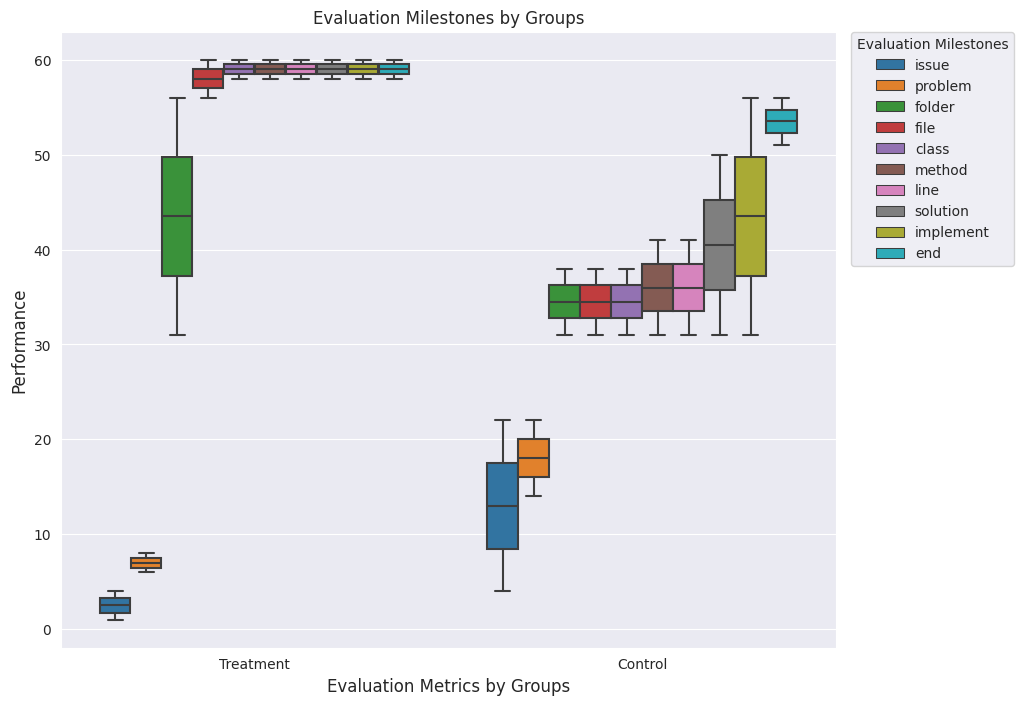

In [64]:
dd=pd.melt(dataBinary_milestones_valid_4612,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [65]:
dataBinary_milestones_valid_4612.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,13.0,18.0,34.5,34.5,34.5,36.0,36.0,40.5,43.5,53.5,4612.0
Treatment,2.5,7.0,43.5,58.0,59.0,59.0,59.0,59.0,59.0,59.0,4612.0


In [66]:
dataBinary_milestones_valid_4612

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,right folder,right file,right class,right method,sound solution,right lines,group,issue_number
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,58,58,58,58,58,n,n,n,n,y,n,Treatment,4612
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,56,56,n,n,n,n,n,n,Control,4612
10,sm4332@nau.edu,3:12 PM,22,22,31,31,31,31,31,31,31,51,n,n,n,n,n,n,Control,4612
21,Connor Wood,3:30 PM,4,8,31,60,60,60,60,60,60,60,n,n,n,n,y,n,Treatment,4612


In [67]:
dataBinary_milestones_valid_5069 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5069]

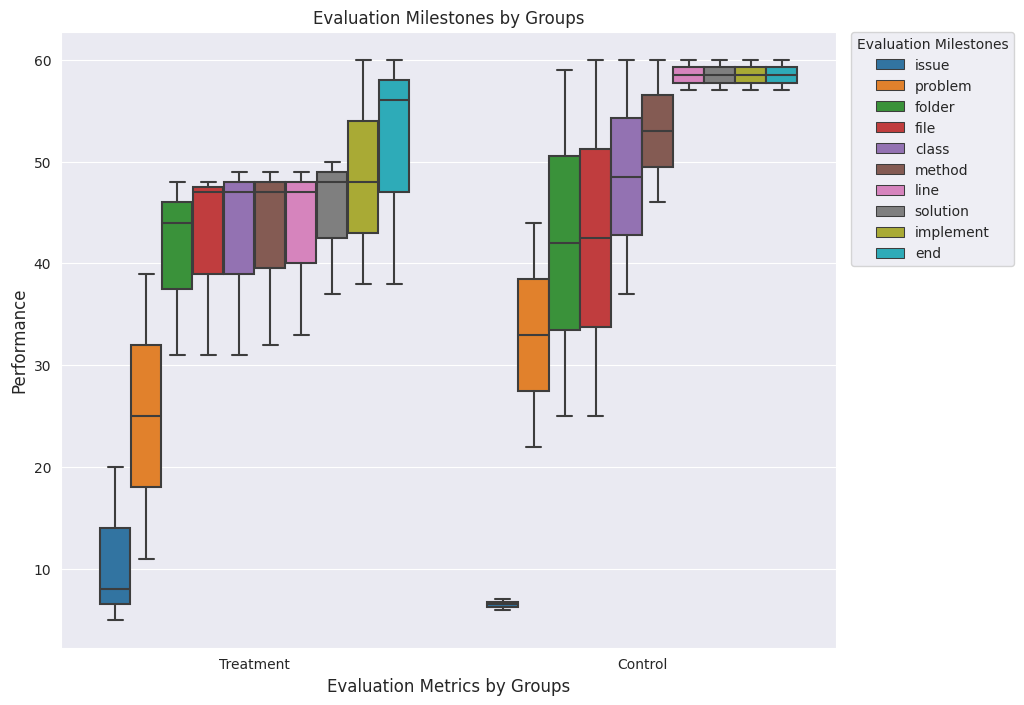

In [68]:
dd=pd.melt(dataBinary_milestones_valid_5069,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [69]:
dataBinary_milestones_valid_5069.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,6.5,33.0,42.0,42.5,48.500000,53.000000,58.5,58.5,58.500000,58.500000,5069.0
Treatment,11.0,25.0,41.0,42.0,42.333333,42.666667,43.0,45.0,48.666667,51.333333,5069.0


In [70]:
dataBinary_milestones_valid_5069

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,right folder,right file,right class,right method,sound solution,right lines,group,issue_number
5,hk486@nau.edu,3:22 PM,20,25,31,31,31,32,33,37,38,38,n,n,n,n,y,n,Treatment,5069
9,"nk545@nau,edu",3:14 PM,7,22,25,25,37,46,57,57,57,57,n,n,n,n,y,n,Control,5069
11,jk2396@nau.edu,5:03 PM,8,39,44,47,47,47,47,48,48,56,n,n,n,n,y,n,Treatment,5069
14,klp468@nau.edu,12:18 PM,6,44,59,60,60,60,60,60,60,60,n,n,n,n,y,n,Control,5069
16,Pedro,9:36 AM,5,11,48,48,49,49,49,50,60,60,y,y,y,y,n,y,Treatment,5069


In [71]:
dataBinary_h1.nlargest(50,['Precision','Fmeasure_Score'])

NameError: name 'dataBinary_h1' is not defined

In [ ]:
dataBinary_h1_doc2vec.nlargest(50,['Precision','Fmeasure_Score'])

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary_h1)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - AUCpr Analysis", size=12)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary_h1)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Hamming Loss Analysis", size=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary_h1)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [ ]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [ ]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [ ]:
#Subsetting data to compute Stats

RF_binary = dataBinary_h1[dataBinary_h1.Algorithm == 'RandomForest']
RF_FMeasure = RF_binary['Fmeasure_Score']

RF_binary_doc2vec = dataBinary_h1_doc2vec[dataBinary_h1_doc2vec.Algorithm == 'RandomForest']
RF_FMeasure_doc2vec = RF_binary_doc2vec['Fmeasure_Score']

#LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
#LogisticRegression_FMeasure = LogisticRegression_binary['Fmeasure_Score']

#MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
#MLPC_FMeasure = MLPC_binary['Fmeasure_Score']

#DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
#DT_FMeasure = DT_binary['Fmeasure_Score']

#MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
#MlkNN_FMeasure = MlkNN_binary['Fmeasure_Score']




In [ ]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, RF_FMeasure_doc2vec)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_FMeasure, RF_FMeasure_doc2vec))

#print(cliffsDelta(RF_FMeasure, LogisticRegression_FMeasure))
#print(cliffsDelta(RF_FMeasure, MLPC_FMeasure))
#print(cliffsDelta(RF_FMeasure, DT_FMeasure))
#print(cliffsDelta(RF_FMeasure, MlkNN_FMeasure)) #divisionByZero error

#Effect_Size LogisticRegression Vs others#
#print(cliffsDelta(LogisticRegression_FMeasure, MLPC_FMeasure))
#print(cliffsDelta(LogisticRegression_FMeasure, DT_FMeasure))
#print(cliffsDelta(LogisticRegression_FMeasure, MlkNN_FMeasure))

#Effect_Size MLPC Vs others
#print(cliffsDelta(MLPC_FMeasure, DT_FMeasure))
#print(cliffsDelta(MLPC_FMeasure, MlkNN_FMeasure))

#Effect_Size MlkNN Vs others
#print(cliffsDelta(MlkNN_FMeasure,DT_FMeasure))


In [ ]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [ ]:
ConfusionMatrix =  './experiment/new/powertoys_w2v/powertoys_w2v_CM(1, 1)895Yes0.2RandomForest0.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


CM = pd.read_csv(ConfusionMatrix, sep=",")

In [ ]:
#parsing Confusion matrix 

list(CM.columns) 
type(CM['0'])

columns = ['Label','TN', 'FP','FN','TP']
df = pd.DataFrame(columns=columns)

df['Label'], df['TN'], df['FP'], df['FN'], df['TP'] = CM['0'].str.split(',', 5).str
df = df.drop(0)


In [ ]:
df